Importing the necessary dependencies

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Data Collection and Processing

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[20])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

In [ ]:
print(X_train[20].shape)

(28, 28)


All the images have the same dim, if not we have to reshape the image

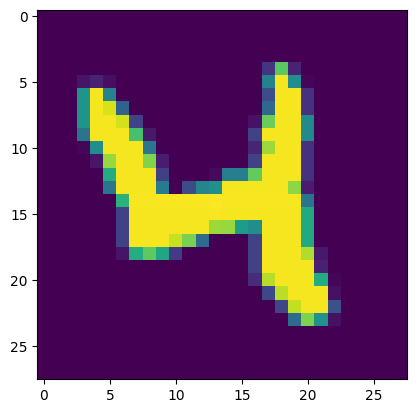

4


In [ ]:
# Displaying the image

plt.imshow(X_train[20])
plt.show()

# Printing the label too
print(Y_train[20])

In [ ]:
# Analyzing the labels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Reshaping to fit CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Normalizing or Scaling the values

X_train_scaled = X_train/255
X_test_scaled = X_test/255

So, All the values is in between (0,1)
since 0/255 =0 and 255/255 =1

Building a CNN

In [ ]:
# Step 1: Setting up the layers
model = Sequential()

# First Conv layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

# Second Conv layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) # output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.8889 - loss: 0.3503 - val_accuracy: 0.9840 - val_loss: 0.0520
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9830 - loss: 0.0531 - val_accuracy: 0.9878 - val_loss: 0.0418
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9898 - loss: 0.0341 - val_accuracy: 0.9898 - val_loss: 0.0393
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.9893 - val_loss: 0.0394
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9900 - val_loss: 0.0437


#### Test Data Accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test data Loss:", loss)
print(f"Test data Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9855 - loss: 0.0475
Test data Loss: 0.04035455361008644
Test data Accuracy: 0.988099992275238


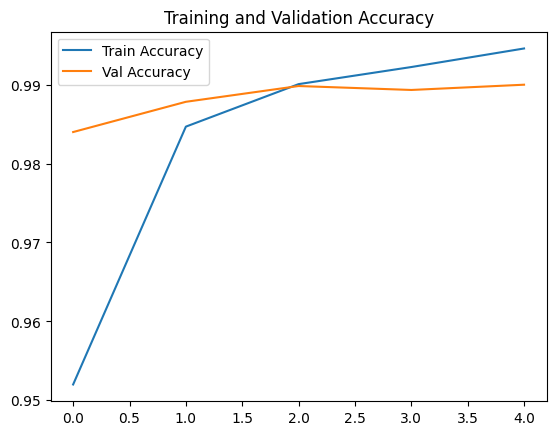

In [ ]:
# Plotting Accuracy and Loss

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


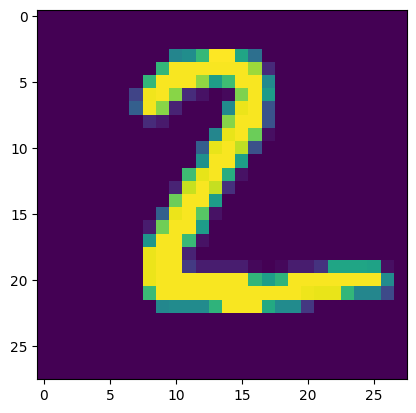

In [ ]:
# Displaying first data in X_test
plt.imshow(X_test[1])
plt.show()

In [ ]:
print(Y_test[1])

2


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
Y_pred.shape

(10000, 10)

In [ ]:
print(Y_pred[1])

[0.         0.         0.99999994 0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
# using np.argmax to convert prediction prob to class label

label_for_2nd_image = np.argmax(Y_pred[1])
print(label_for_2nd_image)

2


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
# Building a Confusion Matrix

confusion_mat = confusion_matrix(Y_test, Y_pred_labels)

print(confusion_mat)

tf.Tensor(
[[ 968    1    1    1    2    0    1    2    3    1]
 [   0 1128    0    3    2    0    0    1    1    0]
 [   0    1 1011    7    1    0    0    6    6    0]
 [   0    0    2 1003    0    3    0    1    1    0]
 [   0    0    0    0  977    0    1    0    1    3]
 [   0    0    1   10    0  875    1    0    2    3]
 [   3    2    3    0    7    8  929    0    6    0]
 [   0    1    4    9    0    0    0 1007    1    6]
 [   0    0    1    1    0    0    0    0  970    2]
 [   0    0    0    1    5    3    0    0    6  994]], shape=(10, 10), dtype=int32)


Text(0.5, 80.7222222222222, 'Predicted Labels')

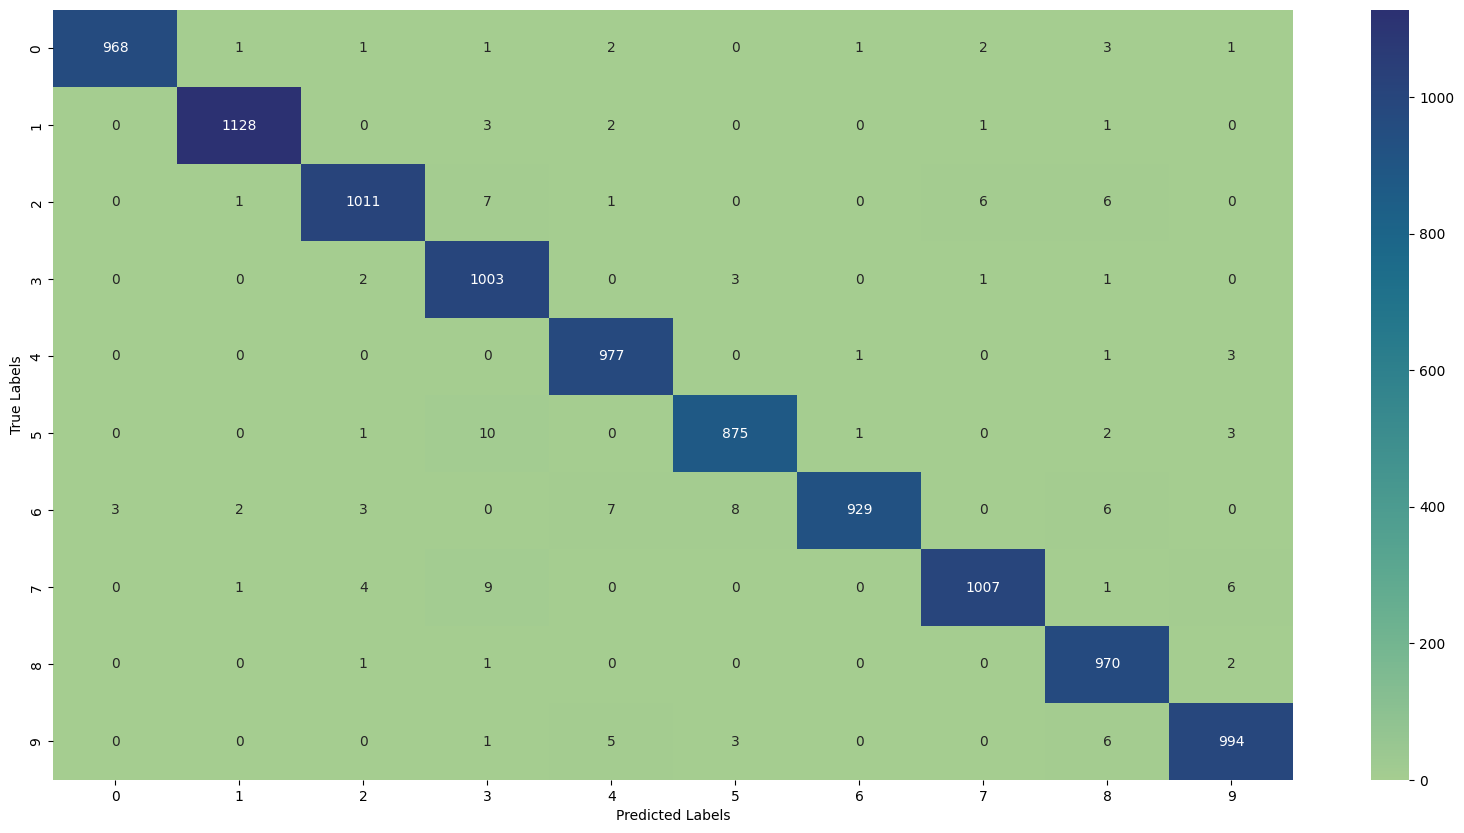

In [ ]:
# Building heatmap
plt.figure(figsize=(20,10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='crest')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [ ]:
input_path = '/content/images.jpeg'

input_image = cv2.imread(input_path)


In [ ]:
type(input_image)

numpy.ndarray

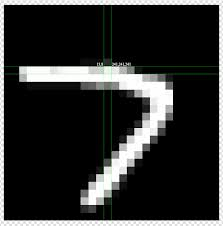

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(226, 223, 3)

In [ ]:
# Converting to grayscale
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale_image.shape

(226, 223)

In [ ]:
#Resizing the image
input_image_resize = cv2.resize(grayscale_image, (28,28))

input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
# Scaling the values
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[[2.1576584e-08 1.8914543e-08 5.6347308e-06 5.6826603e-03 3.9220363e-12
  6.3833090e-07 3.6689456e-14 9.9427718e-01 5.2892769e-06 2.8467070e-05]]


In [ ]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

7


Final Prediction System

Enter the image path to be predicted: /content/images (1).png


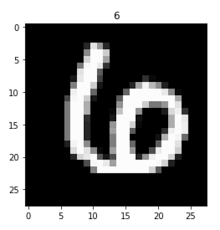

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The Handwritten Digit recognized by the model is: 6


In [ ]:
input_path = input('Enter the image path to be predicted: ')

input_image = cv2.imread(input_path)

cv2_imshow(input_image)

# Converting to grayscale
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

#Resizing the image
input_image_resize = cv2.resize(grayscale_image, (28,28))

# Scaling the values
input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)
print('The Handwritten Digit recognized by the model is:',input_pred_label)
